Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (click the restart button in the tool bar or select Kernel$\rightarrow$Restart in the menu bar) and then **run all cells** (in the menu bar, select Cell$\rightarrow$Run All).

**Make sure you delete `raise NotImplementedError()`** (if existing) and fill in any place that says "YOUR CODE HERE" or "YOUR ANSWER HERE", as well as your name below:

In [1]:
NAME = "Stephen Shell"

**Don't modify the formal TEST cells!**

---

# advanced plotting

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.interpolate import griddata
import seaborn as sns

%matplotlib inline

Choose colormaps that are appropriate for your data; that is, sequential for sequential data or diverging for diverging data, and, as always, make good plot choices. Everything that can be labeled should be labeled.

### 1. Plot 2D function multiple ways (6 points)

Use this code to define a set of gridded, structured data.

    X, Y = np.meshgrid(np.linspace(-4.2, 6.2, 101), np.linspace(-3.2, 3.2, 101))
    Z = np.cos(X**2+Y**2)*(X**2+Y**2)**-0.25 + 0.2*X*Y*np.sin(Y) \
       + 0.01*X*Y**4*np.sin(X) + 0.2*np.exp(-Y**2)

Create three different plots of Z over the X-Y plane as subplots in one figure. Use:
* `pcolormesh`
* `contourf` (you choose the number of levels to use)
* `contour` (you choose the number of levels to use)

Make sure the aspect ratio is 1, and use a colorbar or colorbars properly for the plots. Also note that your data should look reasonably similar in all three of these plots. For the first two plots in particular, be sure to use a reasonable colormap to represent the data.

Below is what I made for your reference. Note that you should have your own style. But please make sure you use the same color palette for all three subplots (for easy comparison among the three subplots).

<img src="p1.png" width=800 />

---

Grading rubric [6 points]:

* [1 pt/plot] Each plot: function used correctly, aspect ratio set to 1, features in Z are recognizable
* [3 pts] Aesthetics. Make sure the label and legend fontsize is large enough.

C:\Users\steph\AppData\Local\Temp/ipykernel_24996/3755434914.py:8: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable0 = axs[0].pcolormesh(X, Y, Z, cmap=cmap)


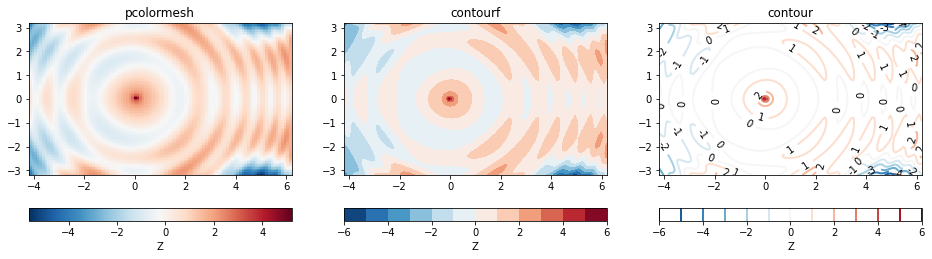

In [3]:
X, Y = np.meshgrid(np.linspace(-4.2, 6.2, 101), np.linspace(-3.2, 3.2, 101))
Z = np.cos(X**2+Y**2)*(X**2+Y**2)**-0.25 + 0.2*X*Y*np.sin(Y) \
   + 0.01*X*Y**4*np.sin(X) + 0.2*np.exp(-Y**2)

fig, axs = plt.subplots(1, 3, figsize=(16,4))
cmap = 'RdBu_r'

mappable0 = axs[0].pcolormesh(X, Y, Z, cmap=cmap)
mappable1 = axs[1].contourf(X, Y, Z, cmap=cmap, levels=12)
mappable2 = axs[2].contour(X, Y, Z, cmap=cmap, linestyles='-', linewidths=2, levels=12)

axs[0].set_title('pcolormesh')
axs[1].set_title('contourf')
axs[2].set_title('contour')

cb0 = fig.colorbar(mappable0, ax=axs[0], orientation="horizontal")
cb0.set_label("Z")
cb1 = fig.colorbar(mappable1, ax=axs[1], orientation="horizontal")
cb1.set_label("Z")
cb2 = fig.colorbar(mappable2, ax=axs[2], orientation="horizontal")
axs[2].clabel(mappable2, fmt='%.f', colors='black')
cb2.set_label("Z")

# raise NotImplementedError()

### 2. 2D interpolation (6 points)

Data (found in `MS03_L15.txt`) gathered from a field cruise out of the TAMU Oceanography department is randomly located in space (that is, unstructured) because of the nature of the measurement: the instrument is lowered into the water from a ship, and moves up and down through the water column as the ship moves to get a sampling of the fields.

1. Read in the data file (you can use either `np.loadtxt(xxx, ...)` or `pd.read_table(xxx, ...)`. Then plot the salinity in a `scatter` plot as a function of depth and latitude, with salinity as color. Be sure that the colors in the markers are visible.
1. Next, interpolate the salinity data to be on a uniform grid of depth and latitude (to make it structured). Hint: when you use meshgrid on depth and latitude, try to use np.linspace to generate a sequence of depth and latitude first (see our class material for reference). If you directly use meshgrid on the original depth and latitude, meshgrid might crash you laptop due to huge memory consumption. 
1. Now, plot the salinity using `contourf`, which requires structured data. Experiment with different spacing in your uniform grid, and with different numbers of contours to see how the results change, and choose values that provide a nice-looking image which closely resembles the original data.

All plots should be in a reasonable orientation given what the data represents in reality. Make sure your axis label and legend fontsize is big enough.

Below is what I made for your reference. Note that you should have your own style.

<img src="p2.png" width=600 />

---

Grading rubric [6 points]:

* [2 pts] Scatter plot: correct, complete, and nice-looking
* [2 pts] Interpolation for gridding
* [2 pts] contourf plot: correct, complete, and nice-looking

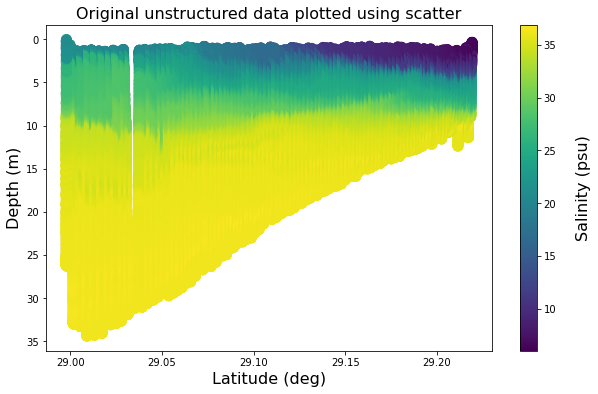

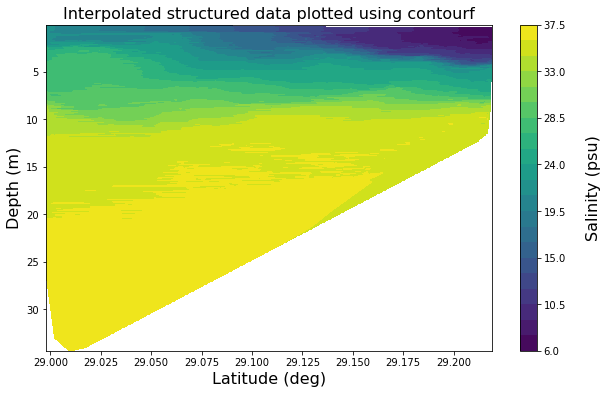

In [4]:
cols = ['latitude', 'longitude', 'depSM', 'tv290C', 'density00', 'sigma-t00', 
        'sbeox0ML', 'v2', 'v3', 'v4', 'wetCDOM', 'flECO-AFL', 'upoly0', 'prdM', 
        'sal00', 'RINKO', 'RINKO DO CTD', 'RINKO DO', 'bottom depth', 'PAR']

df = pd.read_table("MS03_L15.txt", header=None, names=cols, 
                   comment='*', delim_whitespace=True)
#print(df.head())


# uniform grid setup
x = df['latitude']
y = df['depSM']
z = df['sal00']

xi = np.linspace(x.min(), x.max(), 500)
yi = np.linspace(y.min(), y.max(), 500)
X, Y = np.meshgrid(xi, yi)
Z = griddata((x, y), z, (X, Y), method='linear', fill_value=np.nan)


# unstructured
fig, ax0 = plt.subplots(figsize=(10,6))

mappable1 = ax0.scatter(x, y, c=z, s=100, cmap='viridis')
ax0.invert_yaxis()

ax0.set_title('Original unstructured data plotted using scatter', fontsize=16)
ax0.set_xlabel("Latitude (deg)", fontsize=16)
ax0.set_ylabel("Depth (m)", fontsize=16)

cb0 = fig.colorbar(mappable1, ax=ax0, orientation="vertical")
cb0.set_label("Salinity (psu)", fontsize=16, labelpad=20)


# structured contourf
fig, ax2 = plt.subplots(figsize=(10,6))

mappable2 = ax2.contourf(X, Y, Z, cmap='viridis', levels=20)
ax2.invert_yaxis()

ax2.set_title('Interpolated structured data plotted using contourf', fontsize=16)
ax2.set_xlabel("Latitude (deg)", fontsize=16)
ax2.set_ylabel("Depth (m)", fontsize=16)

cb2 = fig.colorbar(mappable2, ax=ax2, orientation="vertical")
cb2.set_label("Salinity (psu)", fontsize=16, labelpad=20)

# raise NotImplementedError()

### 3. explore titanic data using seaborn (7 points)

1. use `sns.load_dataset('titanic')` to load the titanic data and assign it to the df_titanic variable, and then check the first five rows of `df_titanic` (1 point)

2. plot the histogram of fare (2 points)
3. scatter plot of fare vs. age (with linear regression line), separated into two figures by sex (2 points)
4. boxplot of age vs. class (2 points)


use `sns.load_dataset('titanic')` to load the titanic data and assign it to the df_titanic variable, and then check the first five rows of `df_titanic` (1 point)

In [5]:
titanic_df = sns.load_dataset('titanic')
print(titanic_df.head())

# raise NotImplementedError()

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


plot the histogram of fare (2 points)

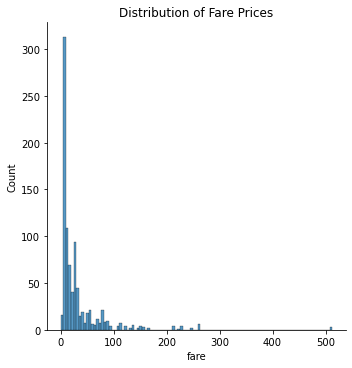

In [6]:
sns.displot(x='fare', data=titanic_df, kde=False).set(title="Distribution of Fare Prices")

# raise NotImplementedError()

scatter plot of fare vs. age (with linear regression line), separated into two figures by sex (2 points). Note that x should be age and y should be fare.

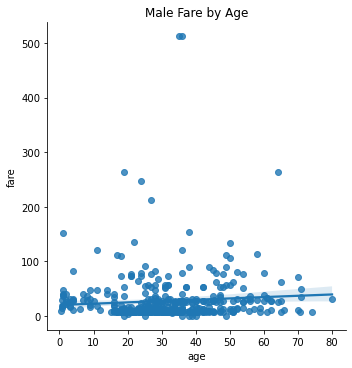

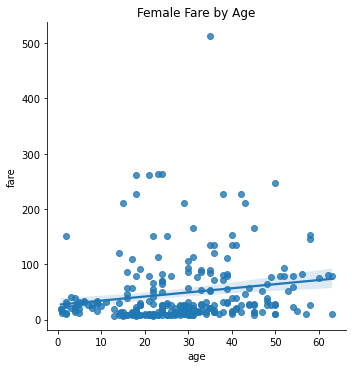

In [7]:
sex = titanic_df.groupby('sex')

sns.lmplot(x='age', y='fare', data=sex.get_group('male'), markers='o').set(title="Male Fare by Age")

sns.lmplot(x='age', y='fare', data=sex.get_group('female'), markers='o').set(title="Female Fare by Age")

# raise NotImplementedError()

boxplot of age vs. class (aka, class on the x axis) (2 points)

[Text(0.5, 1.0, 'Boxplot of Class by Age')]

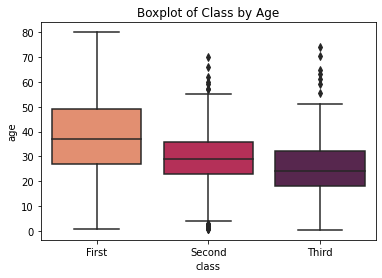

In [8]:
sns.boxplot(x='class', y='age', data=titanic_df, palette='rocket_r').set(title='Boxplot of Class by Age')

# raise NotImplementedError()